In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("AAPL.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-24,23.227501,23.665001,23.162500,23.350000,21.813219,301245600
1,2016-06-27,23.250000,23.262501,22.875000,23.010000,21.495594,181958400
2,2016-06-28,23.225000,23.415001,23.035000,23.397499,21.857594,161779600
3,2016-06-29,23.492500,23.637501,23.407499,23.600000,22.046766,146124000
4,2016-06-30,23.610001,23.942499,23.575001,23.900000,22.327021,143345600


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2021-06-17,129.800003,132.550003,129.649994,131.789993,131.789993,96721700
1254,2021-06-18,130.710007,131.509995,130.240005,130.460007,130.460007,108787300
1255,2021-06-21,130.300003,132.410004,129.210007,132.300003,132.300003,79663300
1256,2021-06-22,132.130005,134.080002,131.619995,133.979996,133.979996,74783600
1257,2021-06-23,133.770004,134.320007,133.229996,133.699997,133.699997,60113700


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1

0        23.350000
1        23.010000
2        23.397499
3        23.600000
4        23.900000
           ...    
1253    131.789993
1254    130.460007
1255    132.300003
1256    133.979996
1257    133.699997
Name: Close, Length: 1258, dtype: float64

In [7]:
import matplotlib.pyplot as plt

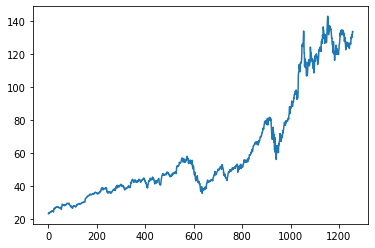

In [8]:
plt.plot(df1)

## LSTM are senstive to the scale of the data. So we apply MinMax scaler

In [9]:
import numpy as np

In [10]:
df1

0        23.350000
1        23.010000
2        23.397499
3        23.600000
4        23.900000
           ...    
1253    131.789993
1254    130.460007
1255    132.300003
1256    133.979996
1257    133.699997
Name: Close, Length: 1258, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.0028298 ]
 [0.        ]
 [0.00322513]
 ...
 [0.90961298]
 [0.92359544]
 [0.92126503]]


## splitting dataset into train and test split

In [13]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(817, 441)

In [15]:
train_data

array([[0.0028298 ],
       [0.        ],
       [0.00322513],
       [0.00491053],
       [0.00740741],
       [0.00801082],
       [0.00613815],
       [0.00726176],
       [0.00811486],
       [0.0096546 ],
       [0.01027883],
       [0.01119434],
       [0.01004995],
       [0.01404494],
       [0.01402414],
       [0.0162089 ],
       [0.01629214],
       [0.0164794 ],
       [0.01537661],
       [0.01377446],
       [0.01102787],
       [0.00963379],
       [0.02270078],
       [0.025593  ],
       [0.02532251],
       [0.02915107],
       [0.02588432],
       [0.02861007],
       [0.02877654],
       [0.03212652],
       [0.03397837],
       [0.03489387],
       [0.03320849],
       [0.03306284],
       [0.03358302],
       [0.03628798],
       [0.03607989],
       [0.03574698],
       [0.03545568],
       [0.03603828],
       [0.03426967],
       [0.03497711],
       [0.03327091],
       [0.03231377],
       [0.03100292],
       [0.03075322],
       [0.02904702],
       [0.029

In [16]:
import numpy
# to convert array of values into a dataset matrix

In [17]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t, t+1, t+2, t+3 and Y = t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train)

[[0.0028298  0.         0.00322513 ... 0.03277153 0.0341032  0.02844361]
 [0.         0.00322513 0.00491053 ... 0.0341032  0.02844361 0.03135664]
 [0.00322513 0.00491053 0.00740741 ... 0.02844361 0.03135664 0.03734914]
 ...
 [0.23358302 0.23422804 0.22602996 ... 0.2636496  0.26604242 0.26770702]
 [0.23422804 0.22602996 0.24652518 ... 0.26604242 0.26770702 0.27201415]
 [0.22602996 0.24652518 0.24367455 ... 0.26770702 0.27201415 0.26824803]]


In [20]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)            #(716,100,1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

## Create the stacked LSTM model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 222ms/step - loss: 0.0094 - val_loss: 0.1755
Epoch 2/100
12/12 [==============================] - 1s 124ms/step - loss: 0.0023 - val_loss: 0.0782
Epoch 3/100
12/12 [==============================] - 1s 124ms/step - loss: 0.0013 - val_loss: 0.0866
Epoch 4/100
12/12 [==============================] - 1s 118ms/step - loss: 6.8689e-04 - val_loss: 0.0312
Epoch 5/100
12/12 [==============================] - 2s 148ms/step - loss: 3.8238e-04 - val_loss: 0.0037
Epoch 6/100
12/12 [==============================] - 2s 156ms/step - loss: 3.4824e-04 - val_loss: 0.0036
Epoch 7/100
12/12 [==============================] - 2s 176ms/step - loss: 3.4060e-04 - val_loss: 0.0075
Epoch 8/100
12/12 [==============================] - 2s 157ms/step - loss: 3.2358e-04 - val_loss: 0.0054
Epoch 9/100
12/12 [==============================] - 2s 173ms/step - loss: 3.2067e-04 - val_loss: 0.0040
Epoch 10/100
12/12 [==============================] - 2s 170ms/step

12/12 [==============================] - 2s 146ms/step - loss: 1.0871e-04 - val_loss: 0.0054
Epoch 79/100
12/12 [==============================] - 2s 151ms/step - loss: 1.1305e-04 - val_loss: 0.0047
Epoch 80/100
12/12 [==============================] - 2s 154ms/step - loss: 1.6117e-04 - val_loss: 0.0108
Epoch 81/100
12/12 [==============================] - 2s 148ms/step - loss: 1.2404e-04 - val_loss: 0.0047
Epoch 82/100
12/12 [==============================] - 2s 146ms/step - loss: 1.0328e-04 - val_loss: 0.0112
Epoch 83/100
12/12 [==============================] - 2s 146ms/step - loss: 1.0027e-04 - val_loss: 0.0053
Epoch 84/100
12/12 [==============================] - 2s 146ms/step - loss: 1.1742e-04 - val_loss: 0.0102
Epoch 85/100
12/12 [==============================] - 2s 146ms/step - loss: 1.0225e-04 - val_loss: 0.0077
Epoch 86/100
12/12 [==============================] - 2s 146ms/step - loss: 9.5922e-05 - val_loss: 0.0110
Epoch 87/100
12/12 [==============================] - 2s 14

In [27]:
## Lets do the predictions and check performance mertics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [28]:
# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
# Calculate RMSE performance matrix
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

43.99291648369332

In [30]:
## Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

126.99030936413537

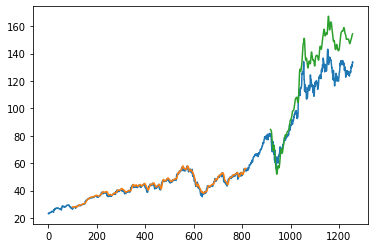

In [31]:
## Plotting
##shift train predicitions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predicitons for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [32]:
len(test_data)

441

In [33]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape  

(1, 100)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input

[0.9249271352500331,
 0.9320016751726451,
 0.9232625743399893,
 0.951976655781052,
 0.946733176971014,
 0.9479816912865023,
 0.9404909799253941,
 0.9353307969927326,
 0.9331668852878278,
 0.9351643051131319,
 0.9170203772943696,
 0.8974614432805182,
 0.888056624617341,
 0.8893881934452538,
 0.8571784983045029,
 0.8560132965122499,
 0.8517685775524403,
 0.8154806053939042,
 0.817727829622045,
 0.872076550242978,
 0.8498543454064306,
 0.824386139845655,
 0.8083228777919976,
 0.819059465033393,
 0.7769454672677332,
 0.8163128816874615,
 0.8070744883204499,
 0.8235538552291685,
 0.8158135308926001,
 0.8404493935763832,
 0.8535996386650143,
 0.8468580825016038,
 0.8116520661955203,
 0.8071576759997446,
 0.8354556442628168,
 0.82838117092364,
 0.8079899522933018,
 0.8121514169903815,
 0.8173116581835488,
 0.8188097854744975,
 0.8064086456459878,
 0.825135236782847,
 0.8322097101220239,
 0.8563462220109458,
 0.8589263051543471,
 0.8729920807992652,
 0.8934664787859684,
 0.9154390040636206,
 0

In [36]:
# demonstrate prediction for next 10 days
from numpy import array
lst_output = []
n_steps = 100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1,n_steps, 1)
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[1.1058967]
101
1 day input [0.93200168 0.92326257 0.95197666 0.94673318 0.94798169 0.94049098
 0.9353308  0.93316689 0.93516431 0.91702038 0.89746144 0.88805662
 0.88938819 0.8571785  0.8560133  0.85176858 0.81548061 0.81772783
 0.87207655 0.84985435 0.82438614 0.80832288 0.81905947 0.77694547
 0.81631288 0.80707449 0.82355386 0.81581353 0.84044939 0.85359964
 0.84685808 0.81165207 0.80715768 0.83545564 0.82838117 0.80798995
 0.81215142 0.81731166 0.81880979 0.80640865 0.82513524 0.83220971
 0.85634622 0.85892631 0.87299208 0.89346648 0.915439   0.90079069
 0.92734073 0.90736575 0.9279234  0.92509364 0.93075316 0.91635453
 0.91960047 0.90661672 0.92642533 0.92975445 0.92700787 0.92026632
 0.91943398 0.90262175 0.9116104  0.8725759  0.8746567  0.8883063
 0.89221809 0.86425297 0.85642947 0.83029541 0.84860589 0.86924672
 0.85942566 0.84760711 0.84627548 0.86808152 0.85243443 0.8663337
 0.86466915 0.86425297 0.85118598 0.84560963 0.84286305 0.84935493
 0.8367041  0.85626297 0.85634622 0.

10 day output [[1.759824]]
11 day input [0.89746144 0.88805662 0.88938819 0.8571785  0.8560133  0.85176858
 0.81548061 0.81772783 0.87207655 0.84985435 0.82438614 0.80832288
 0.81905947 0.77694547 0.81631288 0.80707449 0.82355386 0.81581353
 0.84044939 0.85359964 0.84685808 0.81165207 0.80715768 0.83545564
 0.82838117 0.80798995 0.81215142 0.81731166 0.81880979 0.80640865
 0.82513524 0.83220971 0.85634622 0.85892631 0.87299208 0.89346648
 0.915439   0.90079069 0.92734073 0.90736575 0.9279234  0.92509364
 0.93075316 0.91635453 0.91960047 0.90661672 0.92642533 0.92975445
 0.92700787 0.92026632 0.91943398 0.90262175 0.9116104  0.8725759
 0.8746567  0.8883063  0.89221809 0.86425297 0.85642947 0.83029541
 0.84860589 0.86924672 0.85942566 0.84760711 0.84627548 0.86808152
 0.85243443 0.8663337  0.86466915 0.86425297 0.85118598 0.84560963
 0.84286305 0.84935493 0.8367041  0.85626297 0.85634622 0.86333745
 0.86658338 0.85809403 0.86841444 0.89446519 0.88747395 0.89171861
 0.9053682  0.89429882 

20 day output [[2.1483917]]
21 day input [0.82438614 0.80832288 0.81905947 0.77694547 0.81631288 0.80707449
 0.82355386 0.81581353 0.84044939 0.85359964 0.84685808 0.81165207
 0.80715768 0.83545564 0.82838117 0.80798995 0.81215142 0.81731166
 0.81880979 0.80640865 0.82513524 0.83220971 0.85634622 0.85892631
 0.87299208 0.89346648 0.915439   0.90079069 0.92734073 0.90736575
 0.9279234  0.92509364 0.93075316 0.91635453 0.91960047 0.90661672
 0.92642533 0.92975445 0.92700787 0.92026632 0.91943398 0.90262175
 0.9116104  0.8725759  0.8746567  0.8883063  0.89221809 0.86425297
 0.85642947 0.83029541 0.84860589 0.86924672 0.85942566 0.84760711
 0.84627548 0.86808152 0.85243443 0.8663337  0.86466915 0.86425297
 0.85118598 0.84560963 0.84286305 0.84935493 0.8367041  0.85626297
 0.85634622 0.86333745 0.86658338 0.85809403 0.86841444 0.89446519
 0.88747395 0.89171861 0.9053682  0.89429882 0.90961298 0.92359544
 0.92126503 1.10589671 1.14410245 1.20769465 1.28479314 1.36581278
 1.44500482 1.5195719

In [37]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [38]:
import matplotlib.pyplot as plt

In [39]:
len(df1)

1258

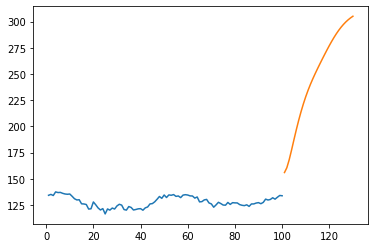

In [40]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

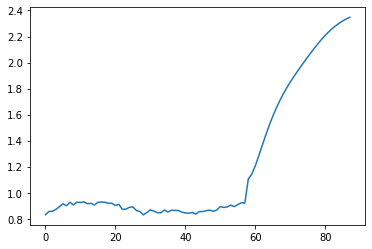

In [41]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [42]:
df3=scaler.inverse_transform(df3).tolist()

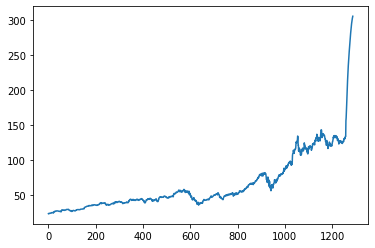

In [43]:
plt.plot(df3)